# Lead Scoring Case Study

In [1]:
%config Completer.use_jedi = False

## Importing Neccessary Libraries

In [2]:
# To Supressing Warnings 

import warnings
warnings.filterwarnings('ignore')

In [3]:
# For EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# For Train-Test split

from sklearn.model_selection import train_test_split

In [5]:
# For scaling variables 

from sklearn.preprocessing import StandardScaler

In [6]:
# For Logistic Regression, RFE and VIF

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  

In [7]:
# Metrics import for model evaluation

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

## Importing Data-set

In [8]:
# Loading data into a dataframe and inspecting a few records

df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Basic EDA

In [9]:
# Dimensions of data

df.shape

(9240, 37)

> The data has 9240 rows and 37 columns.

In [10]:
# Conforming the data types of all columns and check for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

> There are 30 categorical columns and 7 numerical columns in the data. Few columns have missing values which are to be handled in the next steps.
>> Columns such as `Converted` can be treated as categorical, will handle those in the further steps.

In [11]:
# Basic statistical description

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## EDA

### Missing Values Treatment

In [12]:
# Checking percentage of missing values in each columns

(df.isnull().mean()*100).sort_values(ascending = False).round(2)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

> Columns with missing values greater than 30% can be dropped.

In [13]:
# Checking the shape of the data 

df.shape

(9240, 37)

In [14]:
# Dropping columns

df.drop(['Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 
         'Asymmetrique Profile Index', 'Asymmetrique Activity Index', 'Tags'], axis = 1,inplace = True)

In [15]:
# Inspecting the data after dropping unnecessary columns

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [16]:
# Checking the shape of the data - Post dropping of columns

df.shape

(9240, 31)

In [17]:
# Re-inspecting the missing values in order to handle/impute them

(df.isna().mean() * 100).sort_values(ascending = False).round(2)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Do Not Call                                       0.00
Last Notable Activity                             0.00
A free cop

>After dropping columns with more than 30% missing values there are still some columns with missing values we go ahead and impute them with suitable statistical values. 

In [18]:
# Checking for duplicate row entries

df.drop_duplicates().shape

(9240, 31)

> There are no duplicate rows in the data.

In [19]:
# Checking the values of the missing column "What matters most to you in choosing a course"

df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

> We notice that most of the values belong to one category i.e "Better career prospects". We decide to drop it since it does not add any variation/significance to the model.

In [20]:
# Dropping "What matters most to you in choosing a course" column

df.drop(["What matters most to you in choosing a course"],axis = 1,inplace = True)

In [21]:
# Checking the shape of the data - Post droppong column

df.shape

(9240, 30)

In [22]:
# Checking values of the column "Lead Profile" 

df["Lead Profile"].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

> Here, the value select is the default value of the column in other words the customer data for this is missing, hence can be replaced by NaNs and handled accordingly

In [23]:
# Replace 'Select" category with NaNs

df['Lead Profile'].replace(to_replace = ['Select'], value = [np.nan], inplace = True)

In [24]:
# Checking for %age of missing values 

df['Lead Profile'].isna().mean() * 100

74.18831168831169

> Since majority of the data (~75%) is missing, we can go ahead and drop the column

In [25]:
# Dropping "How did you hear about X Education" column

df.drop(["Lead Profile"], axis = 1, inplace = True)

In [26]:
# Checking the shape of the data - Post droppong column

df.shape

(9240, 29)

In [27]:
# Checking values of column "What is your current occupation"

df['What is your current occupation'].value_counts(normalize = True) * 100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

> Since Student, Other, Housewife and Businessman have <5% individually, combining them into "Others" category.

In [28]:
df['What is your current occupation'].replace(to_replace = ['Student', 'Other', 'Housewife', 'Businessman'], 
                                              value = 'Others', inplace = True)

In [29]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Others                   244
Name: What is your current occupation, dtype: int64

In [30]:
# Imputing the missing values via most occurring category

df["What is your current occupation"].fillna(df['What is your current occupation'].mode()[0], inplace = True)

In [31]:
# Re-inspecting if the impute is successful

df['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Others                   244
Name: What is your current occupation, dtype: int64

In [32]:
# Checking values of the column "Country"

df['Country'].value_counts(normalize = True) * 100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
France                   0.088509
Oman                     0.088509
unknown                  0.073757
Germany                  0.059006
Canada                   0.059006
Kuwait                   0.059006
Nigeria                  0.059006
South Africa             0.059006
Sweden                   0.044254
Uganda                   0.029503
China                    0.029503
Ghana                    0.029503
Philippines              0.029503
Belgium                  0.029503
Asia/Pacific Region      0.029503
Netherlands              0.029503
Bangladesh               0.029503
Italy                    0.029503
Tanzania                 0.014751
Malaysia      

In [33]:
# Imputing the missing values via mode

df["Country"].fillna(df['Country'].mode()[0], inplace = True)

In [34]:
# Re-inspecting if the impute is successful

df['Country'].value_counts(normalize = True) * 100

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
Germany                  0.043290
Canada                   0.043290
Kuwait                   0.043290
Nigeria                  0.043290
South Africa             0.043290
Sweden                   0.032468
Uganda                   0.021645
China                    0.021645
Ghana                    0.021645
Philippines              0.021645
Belgium                  0.021645
Asia/Pacific Region      0.021645
Netherlands              0.021645
Bangladesh               0.021645
Italy                    0.021645
Tanzania                 0.010823
Malaysia      

In [35]:
# Clubbing Outside India countries as "Outside India"

df['Country'] = df['Country'].apply(lambda x: 'India' if x == 'India' else 'Outside India')

In [36]:
df['Country'].value_counts(normalize = True) * 100

India            96.893939
Outside India     3.106061
Name: Country, dtype: float64

In [37]:
# Checking values of column "How did you hear about X Education"

df['How did you hear about X Education'].value_counts(normalize = True) * 100

Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64

> Here, the value select is the default value of the column in other words the customer data for this is missing, hence can be replaced by NaNs and handled accordingly

In [38]:
# Replace 'Select" category with NaNs

df['How did you hear about X Education'].replace(to_replace = ['Select'], value = [np.nan], inplace = True)

In [39]:
# Checking for %age of missing values 

df['How did you hear about X Education'].isna().mean() * 100

78.46320346320347

> Since majority of the data (~80%) is missing, we can go ahead and drop the column

In [40]:
# Dropping "How did you hear about X Education" column

df.drop(["How did you hear about X Education"],axis = 1,inplace = True)

In [41]:
# Checking the shape of the data - Post droppong column

df.shape

(9240, 28)

In [42]:
# Checking values of column "Specialization"

df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

> Here, the value select is the default value of the column in other words the customer data for this is missing, hence can be replaced by NaNs and handled accordingly

In [43]:
# Replace 'Select" category with NaNs

df['Specialization'].replace(to_replace = ['Select'], value = [np.nan], inplace = True)

In [44]:
# Checking for %age of missing values 

df['Specialization'].isna().mean() * 100

36.58008658008658

In [45]:
# Imputing the missing values via most occurring category

df["Specialization"].fillna(df['Specialization'].mode()[0], inplace = True)

In [46]:
# Re-inspecting if the impute is successful

df['Specialization'].value_counts(normalize = True) * 100

Finance Management                   47.142857
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [47]:
# Combining Management courses <8% of values as "Other Management Courses"

df['Specialization'].replace(to_replace = ['Operations Management', 'IT Projects Management', 'Supply Chain Management', 
                                        'Healthcare Management', 'Hospitality Management', 'Retail Management'], 
                             value = "Other Management Courses", inplace = True)

In [48]:
# Combining courses <5% of values as "Others"

df['Specialization'].replace(to_replace = ['Media and Advertising', 'Travel and Tourism', 'International Business',
                                           'E-COMMERCE', 'Rural and Agribusiness', 'E-Business', 'Services Excellence'
                                           'Banking, Investment And Insurance'],
                             value = 'Others', inplace = True)

In [49]:
# Re-inspecting the values of the column 

df['Specialization'].value_counts(normalize = True) * 100

Finance Management                   47.142857
Other Management Courses             17.218615
Human Resource Management             9.177489
Marketing Management                  9.069264
Others                                8.939394
Business Administration               4.361472
Banking, Investment And Insurance     3.658009
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [50]:
# Checking values of column "City"

df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

> Here, the value select is the default value of the column in other words the customer data for this is missing, hence can be replaced by NaNs and handled accordingly

In [51]:
# Replace 'Select" category with NaNs

df['City'].replace(to_replace = ['Select'], value = [np.nan], inplace = True)

In [52]:
# Checking for %age of missing values 

df['City'].isna().mean() * 100

39.70779220779221

In [53]:
# Imputing the missing values by mode

df["City"].fillna(df['City'].mode()[0], inplace=True)

In [54]:
#re checking the values of the 
df['City'].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [55]:
# Checking values of column "Last Activity"

df['Last Activity'].value_counts(normalize = True) * 100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Resubscribed to emails           0.010945
Visited Booth in Tradeshow       0.010945
Name: Last Activity, dtype: float64

In [56]:
# Clubbing less then 5% values as "Others"

df['Last Activity'].replace(to_replace = ['Converted to Lead', 'Email Bounced', 'Email Link Clicked', 
                                          'Form Submitted on Website', 'Unreachable', 'Unsubscribed',
                                          'Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked', 
                                          'Email Marked Spam', 'Email Received',
                                          'Visited Booth in Tradeshow', 'Resubscribed to emails'], value = 'Others',
                           inplace = True)

In [57]:
# Checking values of column "Last Activity"

df['Last Activity'].value_counts(normalize = True) * 100

Email Opened               37.616285
SMS Sent                   30.042684
Others                     14.687534
Olark Chat Conversation    10.649010
Page Visited on Website     7.004487
Name: Last Activity, dtype: float64

In [58]:
# Imputing the missing values via mode

df["Last Activity"].fillna(df['Last Activity'].mode()[0], inplace = True)

In [59]:
# Checking values of column "Lead Source"

df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
testone                 1
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
welearnblog_Home        1
youtubechannel          1
blog                    1
Name: Lead Source, dtype: int64

In [60]:
# Replacing the values appropriately

df['Lead Source'].replace(to_replace=['google', 'youtubechannel', 'Welingak Website', 'Referral Sites', 
                                      'Facebook', 'bing', 'Click2call', 'Social Media', 'Press_Release', 
                                      'Live Chat', 'NC_EDM', 'testone', 'Pay per Click Ads', 'WeLearn', 
                                      'welearnblog_Home', 'blog'], 
                          value = ['Google', 'Google', 'Others', 'Others', 'Others', 'Others', 'Others', 
                                   'Others', 'Others', 'Others', 'Others','Others', 'Others',  'Others', 
                                   'Others', 'Others'], inplace = True)

In [61]:
# Imputing the missing values via mode

df["Lead Source"].fillna(df['Lead Source'].mode()[0], inplace=True)

#### Imputing the missing values for numeric columns

In [62]:
df.describe().loc[['mean', '50%'], ['TotalVisits', 'Page Views Per Visit']]

,TotalVisits,Page Views Per Visit
mean,3.445238,2.36282
50%,3.000000,2.00000


> There's not much difference between mean and median, depicts lesser influence of outliers.<br>
>> Replacing with 'mean'

In [63]:
# Imputing with average value

df["TotalVisits"].fillna(df['TotalVisits'].mean(), inplace = True)
df["Page Views Per Visit"].fillna(df['Page Views Per Visit'].mode()[0], inplace=True)

In [64]:
# Checking if all missing values are handled

df.isna().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Cou

> There are no missing values in any column

# Visualization

### Setting Theme Style

In [65]:
# Set plot theme to seaborn whitegrid

plt.style.use("seaborn-whitegrid")

### Uni-variant Analysis

#### Numerical Columns

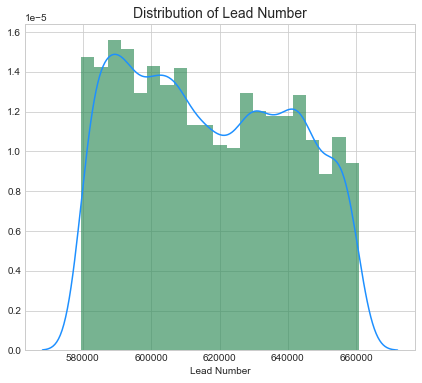

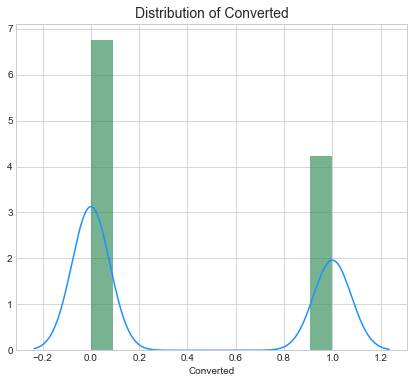

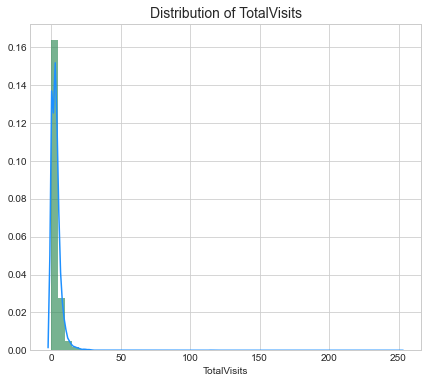

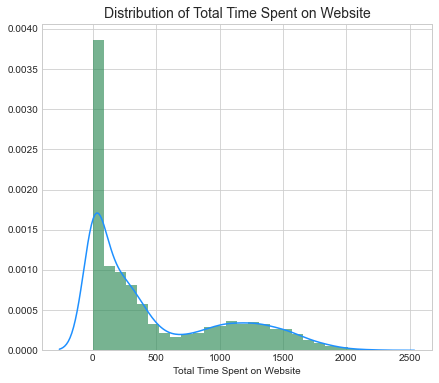

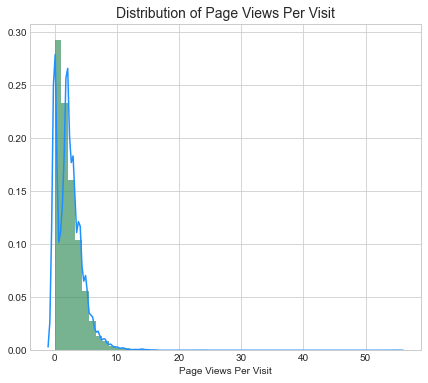

In [66]:
for i in df.select_dtypes('number'):
    plt.figure(figsize = (7, 6))
    
    sns.distplot(df[i], kde_kws = {'color': 'dodgerblue', 'alpha': 1}, hist_kws = {'color': 'seagreen', 'alpha': 0.65})
    
    plt.title("Distribution of {0}" .format(i),fontsize=14)
    plt.ylabel(None)
    plt.show()

> Lead number is almost uniformly distributed and has no trend hence can be dropped<br>

> Converted needs to be treated as a categorical variable<br>

> Total Visits has majority of the value is below 20. But can prove to be a useful indicator<br>

In [67]:
# Dropping Lead Number column

df.drop('Lead Number', axis = 1, inplace = True)

In [68]:
# Checking the dimension after dropping

df.shape

(9240, 27)

##### Outlier Treatment

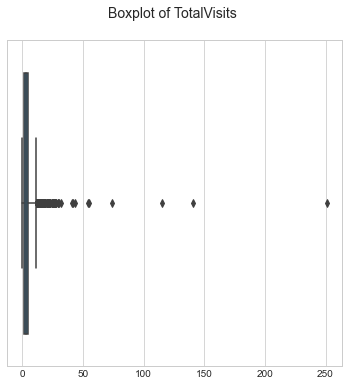

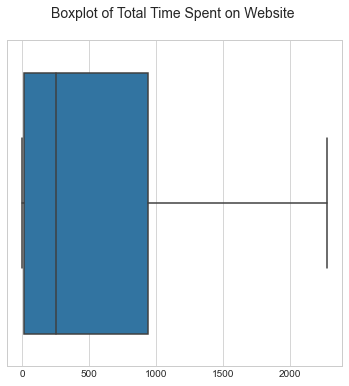

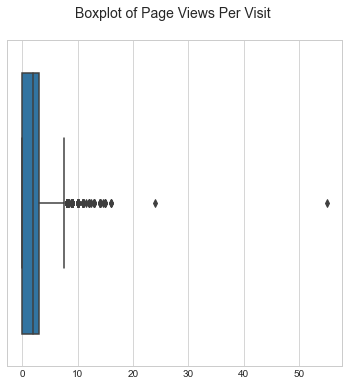

In [69]:
# Inspecting for outliers

for i in df.select_dtypes('number').columns[1:]:
    plt.figure(figsize=[6,6])
    
    sns.boxplot(i, data = df)
    
    plt.title("Boxplot of {0} \n " .format(i),fontsize=14)
    plt.xlabel(None)
    plt.show()

> Only TotalVisits and Page Views Per Visit have outliers. Both need to be capped at the upper end

In [70]:
# Treating outliers

df.loc[df['Page Views Per Visit'] > df['Page Views Per Visit'].quantile(0.99), 'Page Views Per Visit'] = \
df['Page Views Per Visit'].quantile(0.99)

df.loc[df['TotalVisits'] > df['TotalVisits'].quantile(0.99), 'TotalVisits'] = df['TotalVisits'].quantile(0.99)

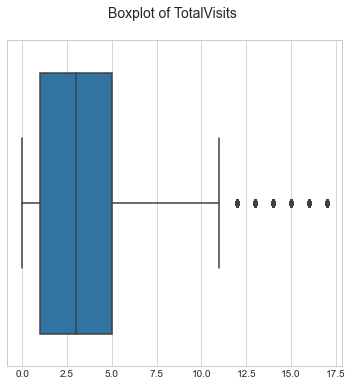

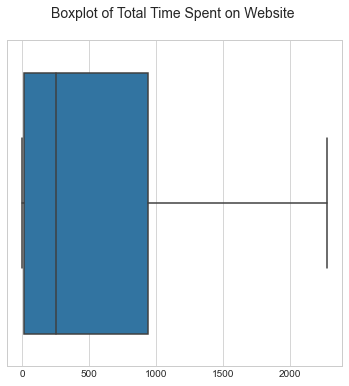

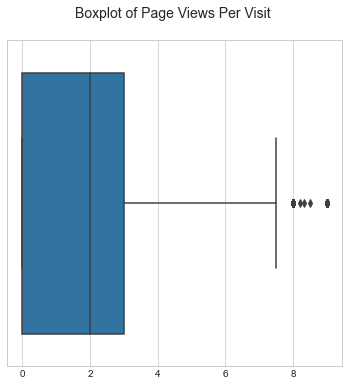

In [71]:
# Inspecting for outliers

for i in df.select_dtypes('number').columns[1:]:
    plt.figure(figsize=[6,6])
    
    sns.boxplot(i, data = df)
    
    plt.title("Boxplot of {0} \n " .format(i),fontsize=14)
    plt.xlabel(None)
    plt.show()

#### Categorical Columns

In [72]:
# Making a list of all column names that have highly skewed values

drop_cols = []
for i in df.select_dtypes('object'):
    if df[i].nunique() <= 2:
        drop_cols.append(i)

print(drop_cols)

['Do Not Email', 'Do Not Call', 'Country', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']


In [73]:
# Analyzing useless columns (checking if they are really useless)

for i in drop_cols:
    print(i)
    print(df[i].value_counts())
    print('\n\n')

Do Not Email
No     8506
Yes     734
Name: Do Not Email, dtype: int64



Do Not Call
No     9238
Yes       2
Name: Do Not Call, dtype: int64



Country
India            8953
Outside India     287
Name: Country, dtype: int64



Search
No     9226
Yes      14
Name: Search, dtype: int64



Magazine
No    9240
Name: Magazine, dtype: int64



Newspaper Article
No     9238
Yes       2
Name: Newspaper Article, dtype: int64



X Education Forums
No     9239
Yes       1
Name: X Education Forums, dtype: int64



Newspaper
No     9239
Yes       1
Name: Newspaper, dtype: int64



Digital Advertisement
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64



Through Recommendations
No     9233
Yes       7
Name: Through Recommendations, dtype: int64



Receive More Updates About Our Courses
No    9240
Name: Receive More Updates About Our Courses, dtype: int64



Update me on Supply Chain Content
No    9240
Name: Update me on Supply Chain Content, dtype: int64



Get updates on DM Content

In [74]:
# Removing non-skewed column names from the list

for i in ['Do Not Email', 'A free copy of Mastering The Interview']:
    drop_cols.remove(i)

In [75]:
# Checking the list of column names that are to be dropped

print(drop_cols)

['Do Not Call', 'Country', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [76]:
# Dropping all categorical columns that have highly skewed values

df.drop(drop_cols, axis = 1, inplace = True)

In [77]:
# Inspecting the shape after dropping columns

df.shape

(9240, 14)

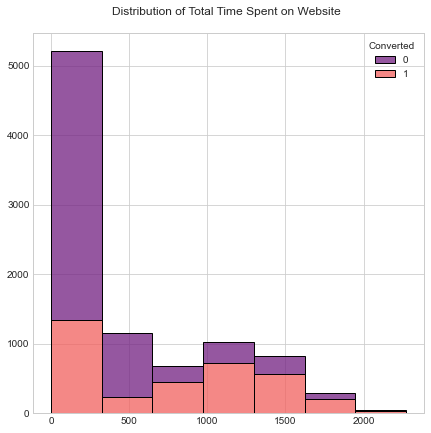

In [78]:
# Visualising the distribution of time spent on website

plt.figure(figsize=[7,7])

sns.histplot(x = 'Total Time Spent on Website', hue = 'Converted', bins = 7, palette = 'magma', multiple='stack', 
             data = df)

plt.title("Distribution of Total Time Spent on Website \n", fontsize=12)
plt.ylabel(None)
plt.xlabel(None)
plt.show()

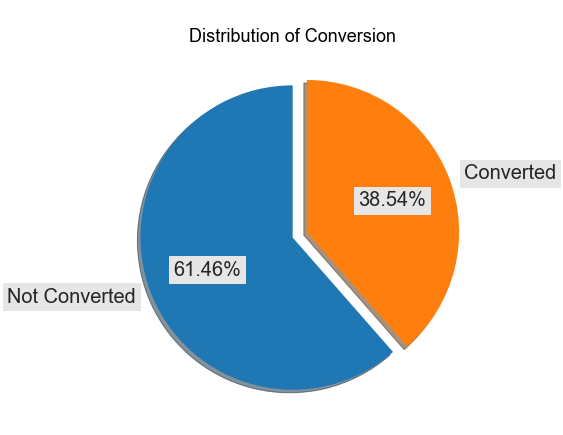

In [79]:
# Visualising the conversion rate

plt.figure(figsize=[7,7])
plt.title("\n Distribution of Conversion ", color='black',fontsize=18)

x = plt.pie(x = df['Converted'].value_counts(), labels = ['Not Converted', 'Converted'], autopct='%1.2f%%', 
            shadow= True, explode = [0, 0.1], textprops= {'fontsize': 20, 'backgroundcolor':(0.9, 0.9, 0.9)}, 
            startangle = 90)

plt.show()

> The data is skewed. This might cause bias in the model

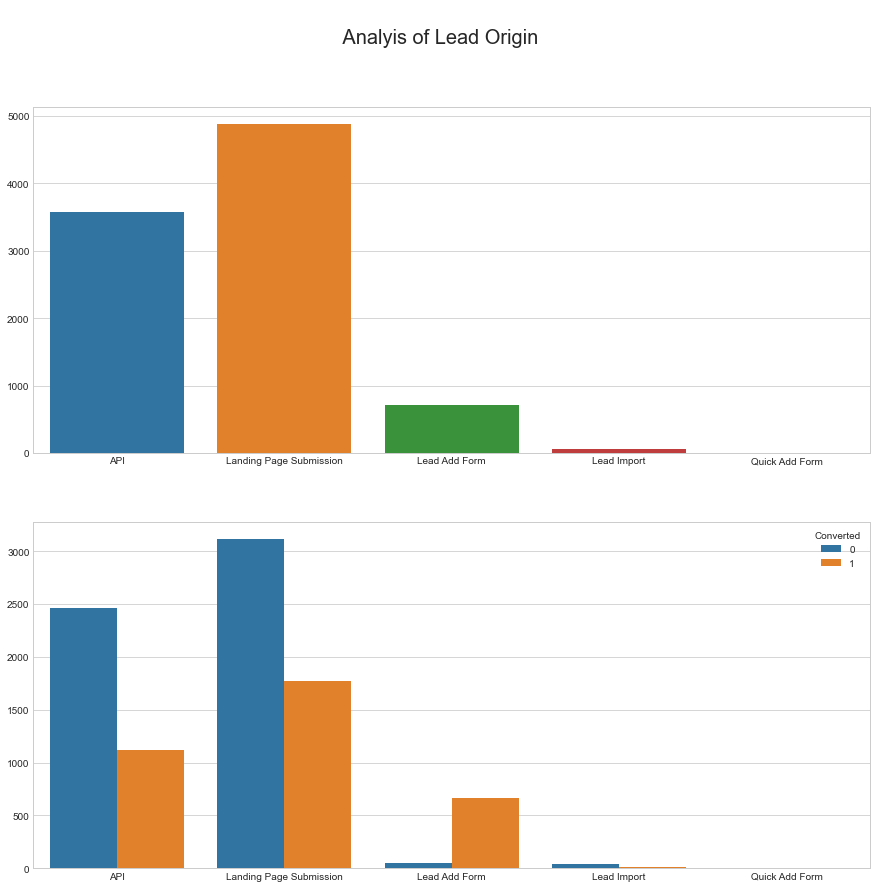

In [80]:
# Analysis of 'Lead Origin'

plt.figure(figsize = (15, 14))
plt.suptitle("\n Analyis of Lead Origin", fontsize = 20)

plt.subplot(2, 1, 1)
sns.countplot('Lead Origin', data = df)

plt.xlabel(None)
plt.ylabel(None)
plt.subplot(2, 1, 2)

sns.countplot('Lead Origin', hue = 'Converted', data = df)

plt.xlabel(None)
plt.ylabel(None)
plt.show()

> Most of the people who land (originate) from Add forms are likely to enroll but less appraoched.<br>

> Landing page submission and API also has fair amount of conversions. 

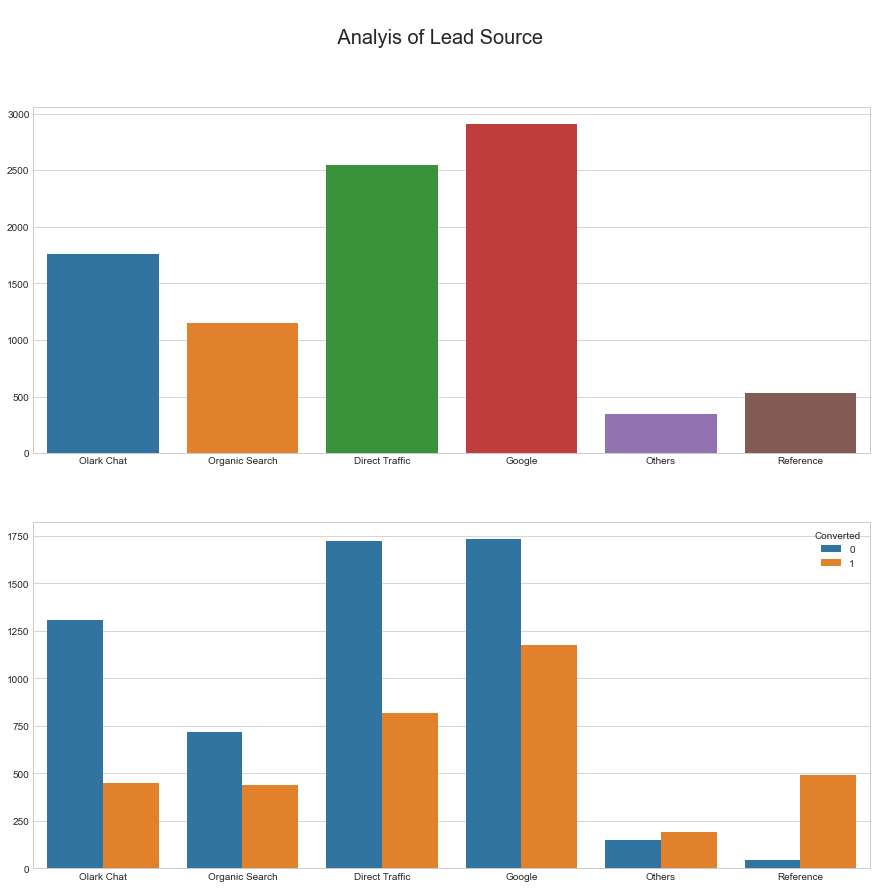

In [81]:
# Analysis of 'Lead score'
 
plt.figure(figsize = (15, 14))

plt.suptitle("\n Analyis of Lead Source", fontsize = 20)

plt.subplot(2, 1, 1)

sns.countplot('Lead Source', data = df)

plt.xlabel(None)
plt.ylabel(None)

plt.subplot(2, 1, 2)

sns.countplot('Lead Source', hue = 'Converted', data = df)

plt.xlabel(None)
plt.ylabel(None)
plt.show()

> Reference has the highest conversion rate.<br>

> 'Olark Chat', 'Direct Traffic' and 'Google' needs improvised conversion rates.

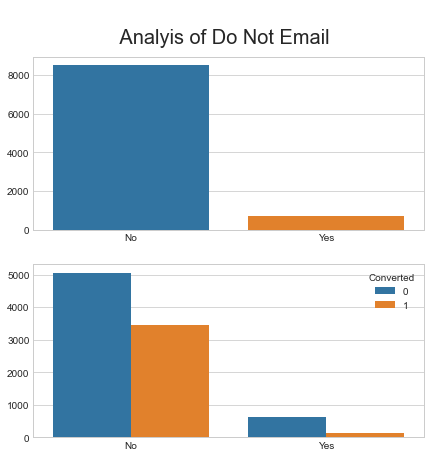

In [82]:
# Analysis of 'Do Not Email'

plt.figure(figsize = (7, 7))

plt.suptitle("\n Analyis of Do Not Email", fontsize = 20)

plt.subplot(2, 1, 1)

sns.countplot('Do Not Email', data = df)

plt.xlabel(None)
plt.ylabel(None)
plt.subplot(2, 1, 2)

sns.countplot('Do Not Email', hue = 'Converted', data = df)

plt.xlabel(None)
plt.ylabel(None)
plt.show()

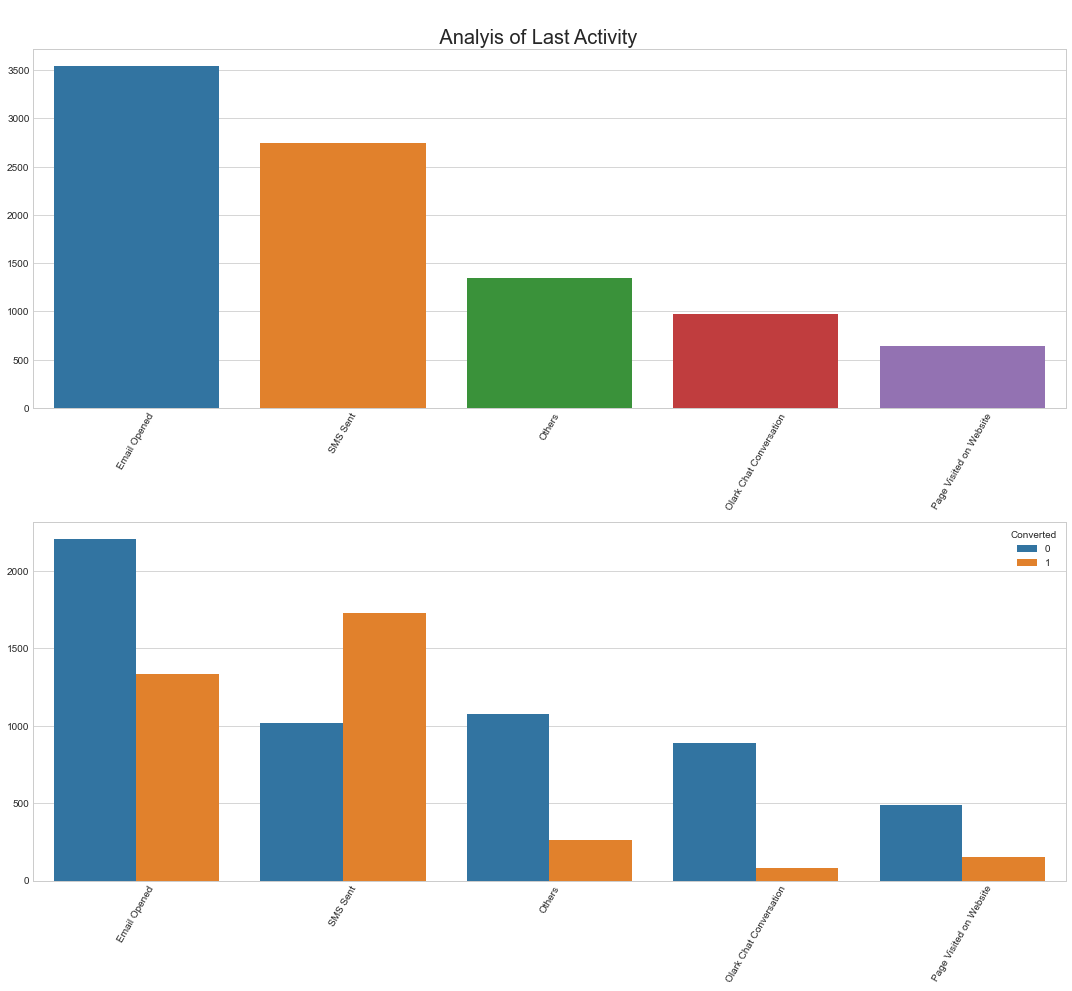

In [83]:
# Analysis of 'Last Activity'

plt.figure(figsize = (15, 14))

plt.suptitle("\n Analyis of Last Activity", fontsize = 20)

plt.subplot(2, 1, 1)

sns.countplot('Last Activity', data = df, order = df['Last Activity'].value_counts().index, )

plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation = 60)
plt.subplot(2, 1, 2)

sns.countplot('Last Activity', hue = 'Converted', data = df, order = df['Last Activity'].value_counts().index)

plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation = 60)
plt.tight_layout()
plt.show()

> Highest conversion rate when SMS are being sent. <br>
> If mail opened up, conversion rate is also fairly good.

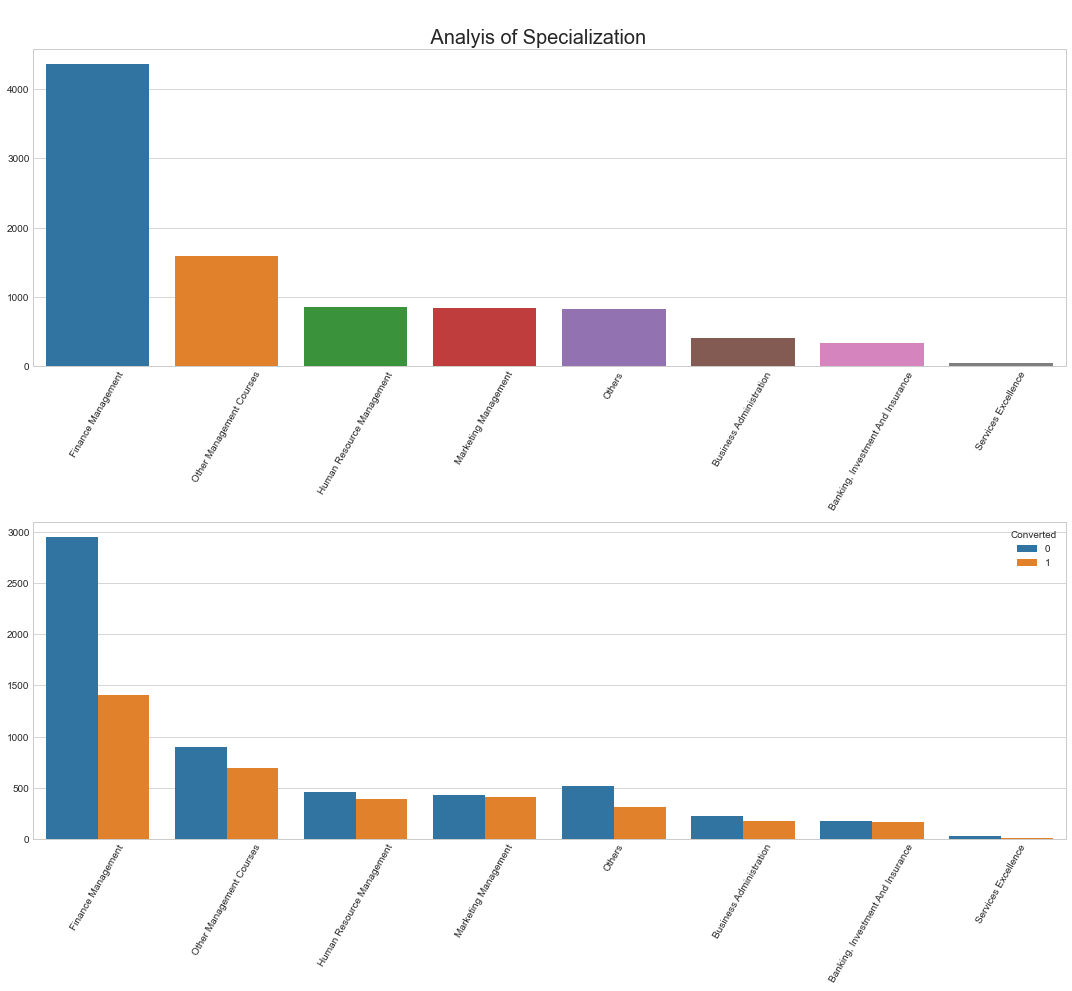

In [84]:
# Analysis of 'Specialization'

plt.figure(figsize = (15, 14))

plt.suptitle("\n Analyis of Specialization", fontsize = 20)

plt.subplot(2, 1, 1)

sns.countplot('Specialization', data = df, order = df['Specialization'].value_counts().index)

plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation = 60)
plt.subplot(2, 1, 2)

sns.countplot('Specialization', hue = 'Converted', data = df, order = df['Specialization'].value_counts().index)

plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation = 60)
plt.tight_layout()
plt.show()

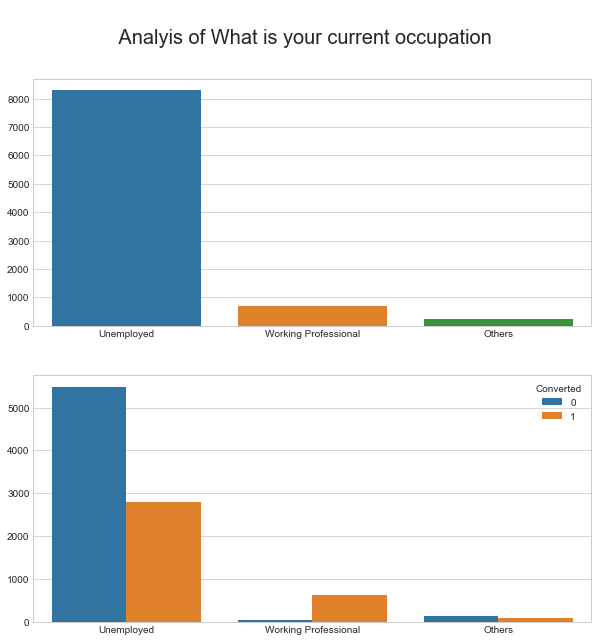

In [85]:
# Analysis of "What is your current occupation"

plt.figure(figsize = (10, 10))

plt.suptitle("\n Analyis of What is your current occupation", fontsize = 20)

plt.subplot(2, 1, 1)

sns.countplot('What is your current occupation', data = df, 
              order = df['What is your current occupation'].value_counts().index)

plt.xlabel(None)
plt.ylabel(None)

plt.subplot(2, 1, 2)

sns.countplot('What is your current occupation', hue = 'Converted', data = df,
              order = df['What is your current occupation'].value_counts().index)

plt.xlabel(None)
plt.ylabel(None)
plt.show()

> Working professionals have the highest conversion rate but Unemployee people are approached the most

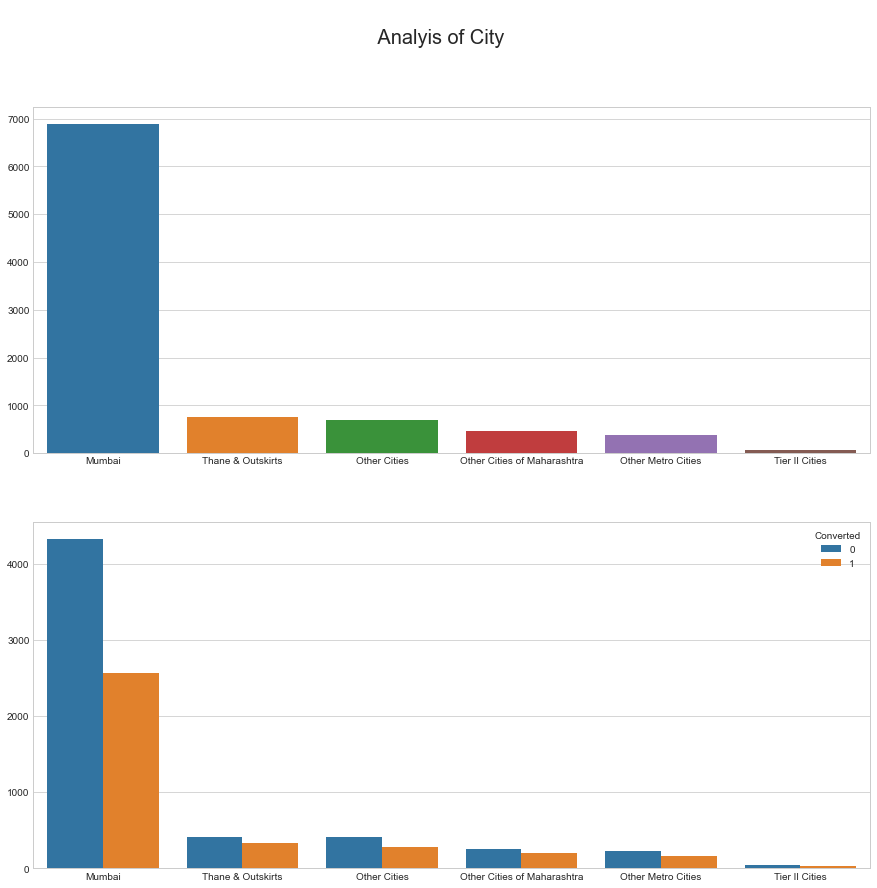

In [86]:
# Analysis of "City"

plt.figure(figsize = (15, 14))

plt.suptitle("\n Analyis of City", fontsize = 20)

plt.subplot(2, 1, 1)

sns.countplot('City', data = df, order = df['City'].value_counts().index)

plt.xlabel(None)
plt.ylabel(None)

plt.subplot(2, 1, 2)

sns.countplot('City', hue = 'Converted', data = df, order = df['City'].value_counts().index)

plt.xlabel(None)
plt.ylabel(None)
plt.show()

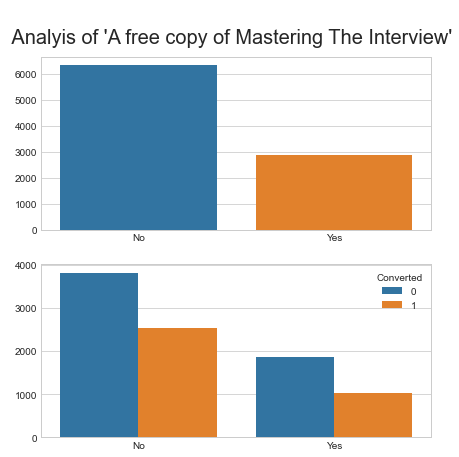

In [87]:
# Analysis of "A free copy of Mastering The Interview"

plt.figure(figsize = (7, 7))

plt.suptitle("\n Analyis of 'A free copy of Mastering The Interview'", fontsize = 20)

plt.subplot(2, 1, 1)

sns.countplot('A free copy of Mastering The Interview', data = df, 
              order = df['A free copy of Mastering The Interview'].value_counts().index)

plt.xlabel(None)
plt.ylabel(None)

plt.subplot(2, 1, 2)

sns.countplot('A free copy of Mastering The Interview', hue = 'Converted', data = df,
              order = df['A free copy of Mastering The Interview'].value_counts().index)

plt.xlabel(None)
plt.ylabel(None)
plt.show()

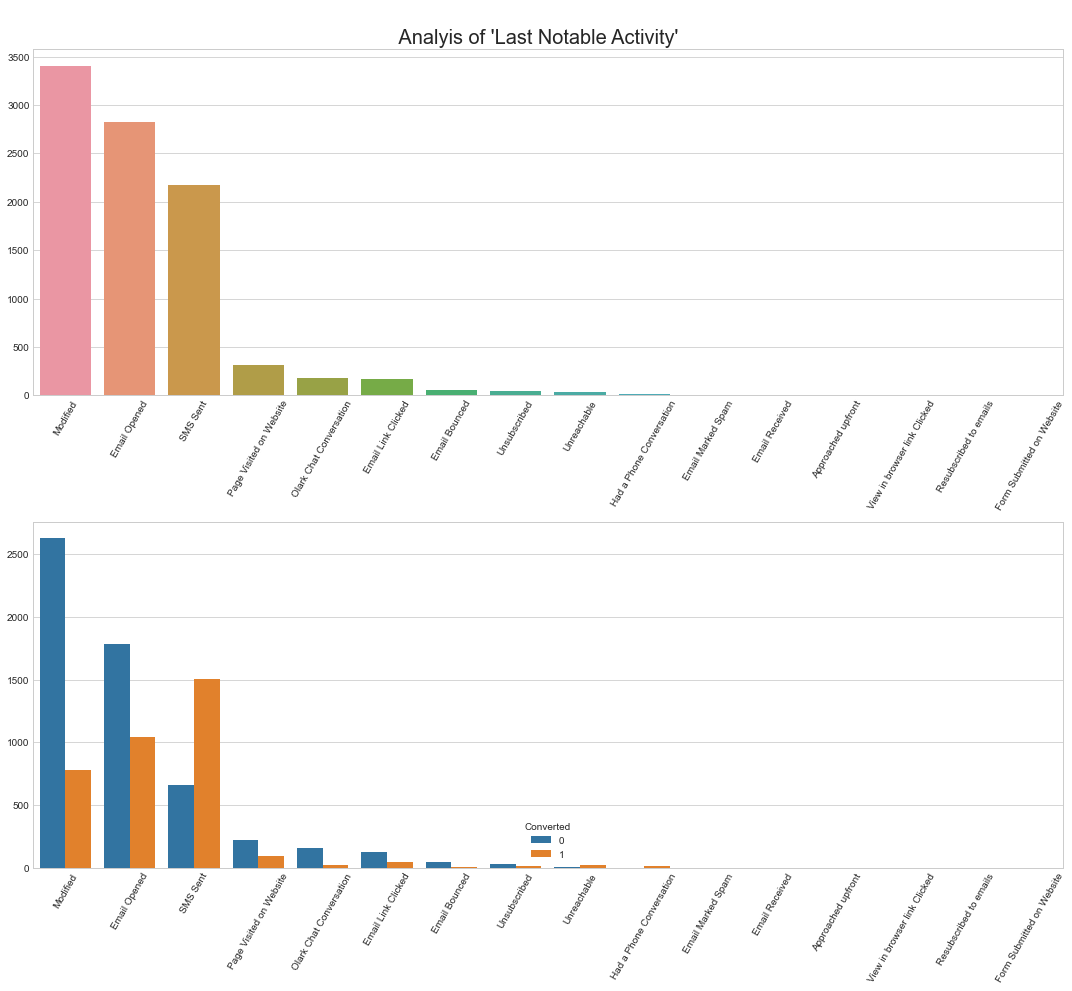

In [88]:
# Analysis of "Last Notable Activity"

plt.figure(figsize = (15, 14))

plt.suptitle("\n Analyis of 'Last Notable Activity'", fontsize = 20)

plt.subplot(2, 1, 1)

sns.countplot('Last Notable Activity', data = df, 
              order = df['Last Notable Activity'].value_counts().index)

plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation = 60)
plt.tight_layout()

plt.subplot(2, 1, 2)

sns.countplot('Last Notable Activity', hue = 'Converted', data = df,
              order = df['Last Notable Activity'].value_counts().index)

plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation = 60)
plt.legend
plt.tight_layout()
plt.show()

>Conversion rate is highest for category SMS sent but it's count is less <br>

> Conversion is fairly good for opened emails.

In [89]:
#inspecting values of Last Activity 
df['Last Activity'].value_counts()

Email Opened               3540
SMS Sent                   2745
Others                     1342
Olark Chat Conversation     973
Page Visited on Website     640
Name: Last Activity, dtype: int64

In [90]:
#inspecting values of Last Notable Activity 
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Approached upfront                 1
View in browser link Clicked       1
Resubscribed to emails             1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

> Since `Last Notable Activity` and `Last Activity` have very similar values and trend in terms of Conversion rate. We can drop one and carry on with the other

In [91]:
#dropping "Last Activity"
df.drop('Last Activity', axis = 1, inplace = True)

In [92]:
#checking the shape after dropping
df.shape

(9240, 13)

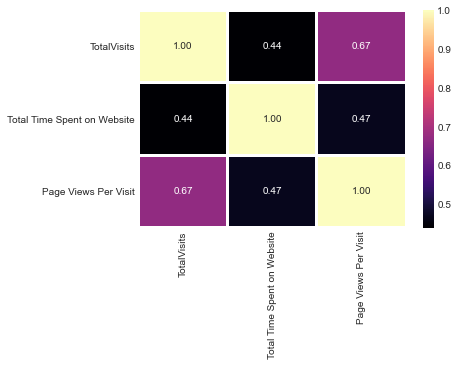

In [93]:
# Heat-map for co-relation matrix for Converted customers

sns.heatmap(df.loc[df['Converted'] == 1, ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr(), 
            annot = True, cmap = "magma", fmt = '.2f', linewidths = 2)

plt.show()

> `TotalVisits` and `Page Views Per Visit` have a fairly good positive correlation. 

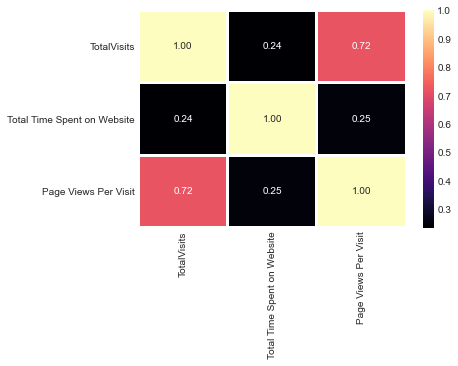

In [94]:
# Heat-map for co-relation matrix for Non-Converted customers

sns.heatmap(df.loc[df['Converted'] == 0, ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr(), 
            annot = True, cmap = "magma", fmt = '.2f', linewidths = 2)

plt.show()

> `TotalVisits` and `Page Views Per Visit` have a high positive correlation. 

## Creating Dummy Variables

In [95]:
# Storing scaling variables for future use (in scaling)

scl_var = df.select_dtypes('number').columns[1:]
scl_var

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [96]:
# Creating a list of categorical column names to create dummy variables

dum_cols = df.select_dtypes('object').columns[1:]
dum_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [97]:
# Creating the dataframe of dummy variables for some categorical columns

der_variables = pd.get_dummies(df[dum_cols], drop_first = True)

der_variables.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Do Not Email_Yes,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [98]:
# Joining the dummy variable to original data and dropping unnecesarry columns

df = pd.concat([df.loc[:, ~df.columns.isin(dum_cols)], der_variables], axis = 1)

In [99]:
# Re-inspecting the data

df.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


## Train-Test Split

In [100]:
# We specify this so that the train and test data set always have the same rows, respectively

train, test = train_test_split(df.drop('Prospect ID', axis = 1), test_size = 0.3, random_state = 100)

In [101]:
# Checking the size of train and test data samples

print('Test =',test.shape)
print('Train =',train.shape)

Test = (2772, 44)
Train = (6468, 44)


## Normalising data

In [102]:
# Scaling the variables for both train and test samples

scaler = StandardScaler()

train[scl_var] = scaler.fit_transform(train[scl_var])
test[scl_var]=scaler.transform(test[scl_var])

In [103]:
# Inspecting train data 

train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,-1.024760,-0.885371,-1.153026,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6795,0,0.203296,0.005716,-0.482827,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0.510310,-0.691418,0.106746,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8105,0,0.510310,1.365219,1.366519,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,-1.024760,-0.885371,-1.153026,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [104]:
# Dividing the predictors and target variable for train data set

y_train = train.pop('Converted')
X_train = train

print(y_train.shape)
print(X_train.shape)

(6468,)
(6468, 43)


In [105]:
# Dividing the predictors and target variable for test data set

y_test = test.pop('Converted')
X_test = test

print(y_test.shape)
print(X_test.shape)

(2772,)
(2772, 43)


## Logistic Regression - Model Building

### Model 01

In [106]:
# Building a model logm1 with all variables from data

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6426
Model Family:                Binomial   Df Model:                           41
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 08 Feb 2021   Deviance:                          nan
Time:                        23:47:42   Pearson chi2:                 8.54e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 6.176e+14   1.15e+07   5.35e+07      0.000    6.18e+14    6.18e+14
TotalVisits                                           1.718e+14   1.24e+06   1.38e+08      0.000    1.72e+14    1.72e+14
Total Time Spent on Website                           6.779e+14   9.46e+05   7.17e+08      0.000    6.78e+14    6.78e+14
Page Views Per Visit                                 -1.177e+14    1.4e+06  -8.43e+07      0.000   -1.18e+14   -1.18e+14
Lead Origin_Landing Page Submission                   -1.65e+14   2.93e+06  -5.63e+07      0.000   -1.65e+14   -1.65e+14
Lead Origin_Lead Add Form                             1.485e+15   7.93e+06   1.87e+08      0.000    1.49e+15    1.49e+15
Lead Origin_Lead Import                                3.64e+13   1.33e+07   2.74e+06      0.000    3.64e+13    3.64e+13
Lead Origin_Quick Add Form                            3.168e+15   6.75e+07   4.69e+07      0.000    3.17e+15    3.17e+15
Lead Source_Google                                     3.43e+14    2.8e+06   1.22e+08      0.000    3.43e+14    3.43e+14
Lead Source_Olark Chat                                5.299e+12   3.81e+06   1.39e+06      0.000     5.3e+12     5.3e+12
Lead Source_Organic Search                            1.067e+14   3.22e+06   3.31e+07      0.000    1.07e+14    1.07e+14
Lead Source_Others                                    2.139e+14    6.5e+06   3.29e+07      0.000    2.14e+14    2.14e+14
Lead Source_Reference                                -2.453e+14   8.83e+06  -2.78e+07      0.000   -2.45e+14   -2.45e+14
Do Not Email_Yes                                     -5.272e+14   3.48e+06  -1.52e+08      0.000   -5.27e+14   -5.27e+14
Specialization_Business Administration               -2.294e+14   6.02e+06  -3.81e+07      0.000   -2.29e+14   -2.29e+14
Specialization_Finance Management                    -3.713e+14   4.87e+06  -7.62e+07      0.000   -3.71e+14   -3.71e+14
Specialization_Human Resource Management             -1.687e+14   5.27e+06   -3.2e+07      0.000   -1.69e+14   -1.69e+14
Specialization_Marketing Management                  -1.169e+14   5.25e+06  -2.22e+07      0.000   -1.17e+14   -1.17e+14
Specialization_Other Management Courses               -1.56e+14   4.93e+06  -3.16e+07      0.000   -1.56e+14   -1.56e+14
Specialization_Others                                -3.888e+13   5.36e+06  -7.25e+06      0.000   -3.89e+13   -3.89e+13
Specialization_Services Excellence                   -8.871e+13   1.29e+07  -6.86e+06      0.000   -8.87e+13   -8.87e+13
What is your current occupation_Unemployed           -2.989e+14   5.42e+06  -5.51e+07      0.000   -2.99e+14   -2.99e+14
What is your current occupation_Working Professional  4.17

> This model consists too many variables and hence bulky. This might overfit and affect predictability. We proceed to RFE to identify the top 8 variables that support the regression.

### RFE - Model 02

In [107]:
# Running RFE with the output number of the variable equal to 7

logm1_rfe = LogisticRegression()
logm1_rfe.fit(X_train, y_train)

rfe = RFE(logm1_rfe, 7)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [108]:
# Listing all variables that support regression

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 20),
 ('Lead Origin_Quick Add Form', False, 16),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Others', False, 13),
 ('Lead Source_Reference', False, 36),
 ('Do Not Email_Yes', True, 1),
 ('Specialization_Business Administration', False, 27),
 ('Specialization_Finance Management', False, 11),
 ('Specialization_Human Resource Management', False, 29),
 ('Specialization_Marketing Management', False, 30),
 ('Specialization_Other Management Courses', False, 28),
 ('Specialization_Others', False, 31),
 ('Specialization_Services Excellence', False, 35),
 ('What is your current occupation_Unemployed', False, 6),
 ('What is your current occupation_Working Professional', Tr

#### Checking Multicollinearity among significant variables 

In [109]:
# Creating training set of top 7 variables that support regression

X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [110]:
# Calculating the Variable inflation factor
vif = pd.DataFrame()

X = X_train_rfe

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.14
3,What is your current occupation_Working Profes...,1.13
5,Last Notable Activity_SMS Sent,1.12
0,Total Time Spent on Website,1.05
2,Do Not Email_Yes,1.01
4,Last Notable Activity_Had a Phone Conversation,1.00
6,Last Notable Activity_Unreachable,1.00


> The VIF of all variables are <2, theres not much effect of multicollinearity.

### Model 02

In [111]:
# Assessing the model with StatsModels

X_train_rfe = sm.add_constant(X_train_rfe)

logm2 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())

res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6460
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2822.8
Date:                Mon, 08 Feb 2021   Deviance:                       5645.6
Time:                        23:47:44   Pearson chi2:                 7.43e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3253      0.042    -31.721      0.000      -1.407      -1.243
Total Time Spent on Website                              0.9489      0.034     28.014      0.000       0.882       1.015
Lead Origin_Lead Add Form                                3.7307      0.176     21.157      0.000       3.385       4.076
Do Not Email_Yes                                        -1.3705      0.159     -8.645      0.000      -1.681      -1.060
What is your current occupation_Working Professional     2.7500      0.185     14.866      0.000       2.387       3.113
Last Notable Activity_Had a Phone Conversation           3.4897      1.091      3.199      0.001       1.351       5.628
Last Notable Activity_SMS Sent                           1.6195      0.076     21.304      0.000       1.471       1.769
Last Notable Activity_Unreachable                        1.8235      0.509      3.584      0.000       0.826       2.821
========================================================================================================================
"""

> We find that the p-value for some variables are >0.05, thereby not adding any significance. Let's carry on to calculate the accuracy and analyse the drop and also decide the cut-off value.

In [112]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_rfe)


# Inspecting first 10 predicted values

y_train_pred[:10]

1871    0.102903
6795    0.210845
3516    0.121176
8105    0.830570
3934    0.102903
4844    0.991933
3297    0.117347
8071    0.992662
987     0.320743
7423    0.897324
dtype: float64

In [113]:
# Creating a dataframe with the actual convert flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})

y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID
1871,0,0.102903,1871
6795,0,0.210845,6795
3516,0,0.121176,3516
8105,0,0.830570,8105
3934,0,0.102903,3934


In [114]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final['Convert_Prob'].map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,predicted
1871,0,0.102903,1871,0
6795,0,0.210845,6795,0
3516,0,0.121176,3516,0
8105,0,0.830570,8105,1
3934,0,0.102903,3934,0


In [115]:
# Confusion matrix 

confusion = confusion_matrix(y_train_pred_final['Convert'], y_train_pred_final['predicted'])
print(confusion)

[[3547  455]
 [ 871 1595]]


In [116]:
# Checking the overall accuracy.

print(accuracy_score(y_train_pred_final['Convert'], y_train_pred_final['predicted']).round(2) * 100, '%')

79.0 %


In [117]:
# Creating a list of column names that support rfe

cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Do Not Email_Yes',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

> All independent variables are significant and VIF is <2. From these 2 aspects the model is a good fit. Lets evaluate the model further

> No drop in significance, p-values for all variables indicates that all variables are ***significant*** and ***no multi-collinearity*** detected.

### Tuning Model - Threshold

In [118]:
# Function to plot ROC

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False)
    
    auc_score = roc_auc_score(actual, probs)
    
    plt.figure(figsize=(5, 5))
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [119]:
# Calculation of ROC metrics

fpr, tpr, thresholds = roc_curve(y_train_pred_final['Convert'], y_train_pred_final['predicted'], 
                                         drop_intermediate = False)

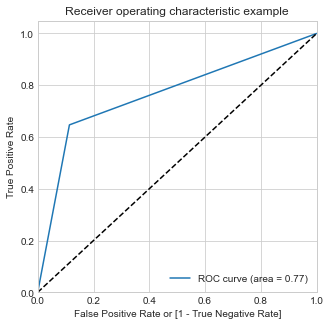

In [120]:
draw_roc(y_train_pred_final['Convert'], y_train_pred_final['predicted'])

In [121]:
# Function to plot confusion matrix

def plot_ConfusionMatrix_metrics(conf_mat, test_y, pred_y, figsize = None, class_names = None, hide_spines = False, 
                                 hide_ticks = False, title = ''): 
    '''
    conf_mat: Output of the confusion_matrix method
    test_y: The true values
    pred_y: The predicted values
    figsize: The size of confusion matrix that needs to be displayed
    class_names: Axes titles
    hide_splines: Option to remove splines. Default False
    hide_ticks: OPtion to hide ticks. Default False
    title: Title of the graph
    '''
    if figsize is None:
        figsize = (len(conf_mat)*3, len(conf_mat)*3)
    
    fig, ax = plt.subplots(figsize = figsize)
    
    matshow = ax.matshow(conf_mat)
    
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            cell_text = ''
            cell_text += format(conf_mat[i, j], '.0f')
            ax.text(x=j,
                        y=i,
                        s=cell_text,
                        va='center',
                        ha='center',
                        fontsize = 20,
                        color="white" if [i, j] != [0, 0]
                        else "black")

    if hide_spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        
    ax.xaxis.set_ticks_position('top')
    
    ax.set_xticklabels(class_names, fontsize = 17)
    ax.set_yticklabels(class_names, fontsize = 17)
    ax.xaxis.set_label_coords(0.5, 1.15)
    
    plt.title(title, fontsize = 20, y = 1.2)
    plt.xlabel('Predicted', fontsize = 15)
    plt.ylabel('Actual', fontsize = 15)
    
    ax.text(2.5, 0.2, 'Accuracy %:' + str(round(accuracy_score(test_y, pred_y) * 100, 2)), fontsize = 17)
    ax.text(1.8, 0.4, 'Precision %: ' + str(round(precision_score(test_y, pred_y) *100, 2)), fontsize = 17)
    ax.text(3.4, 0.4, 'Sensitivity: ' + str(round(conf_mat[1][1] / (conf_mat[1][1] + conf_mat[1][0]), 2)), fontsize = 17)
    ax.text(1.8, 0.7, 'Specificity: ' + str(round(conf_mat[0][0] / (conf_mat[0][0] + conf_mat[0][1]), 2)), fontsize = 17)
    ax.text(3.4, 0.7, 'F1 Score: ' + str(round(f1_score(test_y, pred_y), 2)), fontsize = 17)
    ax.text(2.725, 0.55, 'AUC: ' + str(round(roc_auc_score(test_y, pred_y), 2)), fontsize = 17)
    
    plt.tight_layout()

In [122]:
# Changing plot style

plt.style.use('default')    

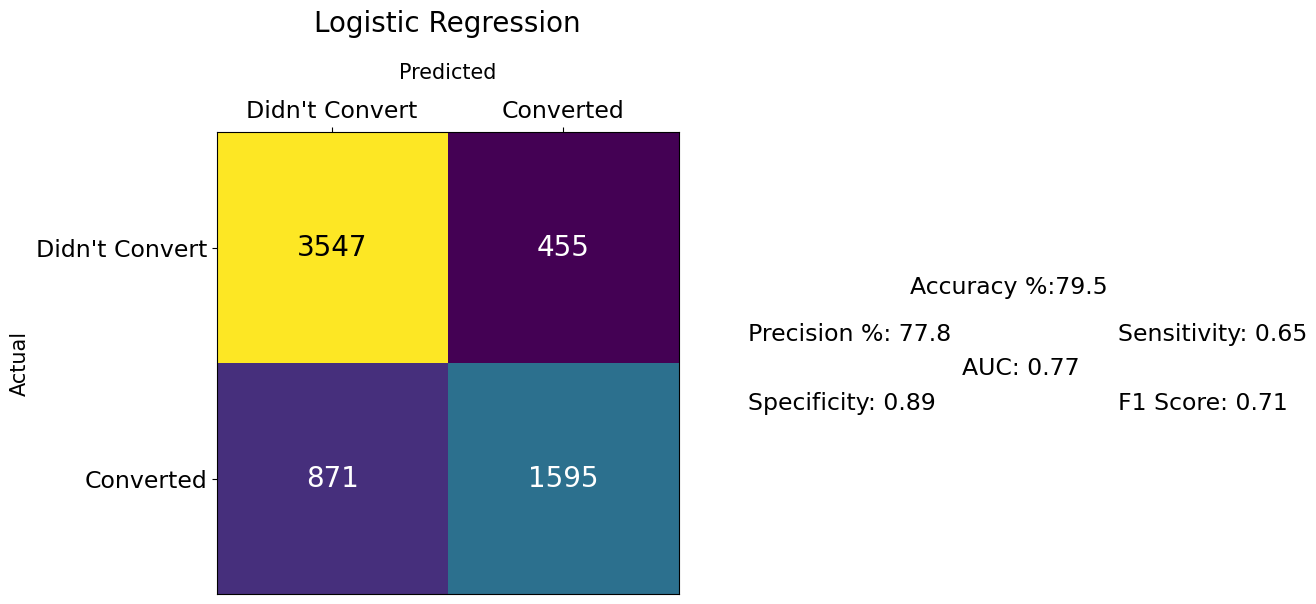

In [123]:
# Plotting the confusion matrix

plot_ConfusionMatrix_metrics(confusion_matrix(y_train_pred_final['Convert'], y_train_pred_final['predicted']), 
                             y_train_pred_final['Convert'], y_train_pred_final['predicted'], 
                             class_names = ['Didn\'t Convert', 'Didn\'t Convert', 'Converted'], 
                             title = 'Logistic Regression')

> **Optimal cutoff probability is that prob where we get balanced sensitivity and specificity**

In [124]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['Convert_Prob'].map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.102903,1871,0,1,1,0,0,0,0,0,0,0,0
6795,0,0.210845,6795,0,1,1,1,0,0,0,0,0,0,0
3516,0,0.121176,3516,0,1,1,0,0,0,0,0,0,0,0
8105,0,0.830570,8105,1,1,1,1,1,1,1,1,1,1,0
3934,0,0.102903,3934,0,1,1,0,0,0,0,0,0,0,0


In [125]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

for i in numbers:
    cm1 = confusion_matrix(y_train_pred_final['Convert'], y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381262     1.000000     0.000000
0.1   0.1  0.427798     0.996350     0.077461
0.2   0.2  0.773500     0.875101     0.710895
0.3   0.3  0.799320     0.846310     0.770365
0.4   0.4  0.788343     0.742903     0.816342
0.5   0.5  0.794991     0.646796     0.886307
0.6   0.6  0.794682     0.571776     0.932034
0.7   0.7  0.782004     0.498378     0.956772
0.8   0.8  0.764069     0.423763     0.973763
0.9   0.9  0.709647     0.255069     0.989755


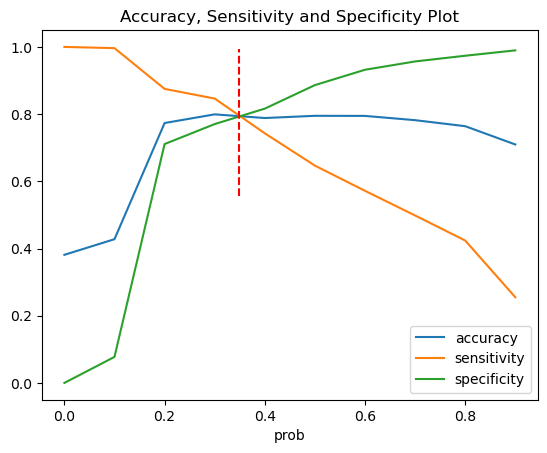

In [126]:
# Plotting accuracy sensitivity and specificity for various probabilities

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])

plt.axvline(x = 0.348, ymin = 0.55, ymax = 0.95, linestyle = 'dashed', color = 'r')

plt.title('Accuracy, Sensitivity and Specificity Plot')
plt.show()

> From the curve above, 0.348 is the ***optimum point*** to take it as a cutoff probability.

In [127]:
# Predicting y_train_pred_final for the optimal cut-off

y_train_pred_final['final_predicted'] = y_train_pred_final['Convert_Prob'].map(lambda x: 1 if x > 0.348 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1871,0,0.102903,1871,0,1,1,0,0,0,0,0,0,0,0,0
6795,0,0.210845,6795,0,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.121176,3516,0,1,1,0,0,0,0,0,0,0,0,0
8105,0,0.830570,8105,1,1,1,1,1,1,1,1,1,1,0,1
3934,0,0.102903,3934,0,1,1,0,0,0,0,0,0,0,0,0


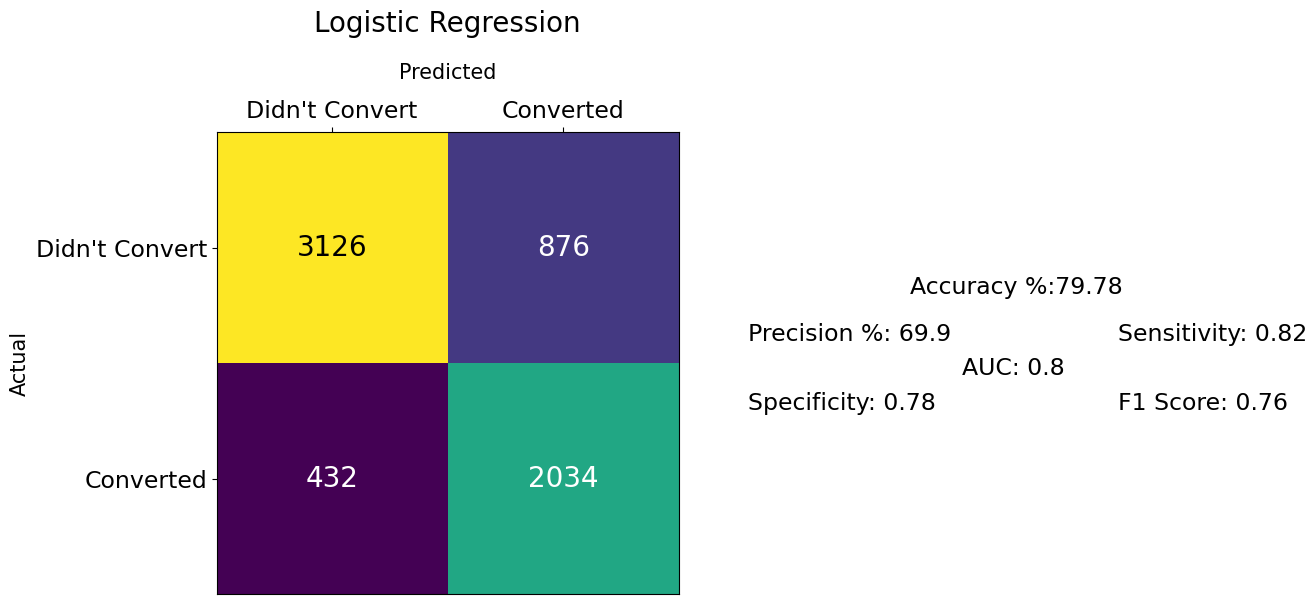

In [128]:
# Plotting confusion matrix for the new cutoff

plot_ConfusionMatrix_metrics(confusion_matrix(y_train_pred_final['Convert'], y_train_pred_final['final_predicted']), 
                             y_train_pred_final['Convert'], y_train_pred_final['final_predicted'], 
                             class_names = ['Didn\'t Convert', 'Didn\'t Convert', 'Converted'], 
                             title = 'Logistic Regression')

### Precision and recall tradeoff

In [129]:
# Calculating precision and recall 

p, r, thresholds = precision_recall_curve(y_train_pred_final['Convert'], y_train_pred_final['Convert_Prob'])

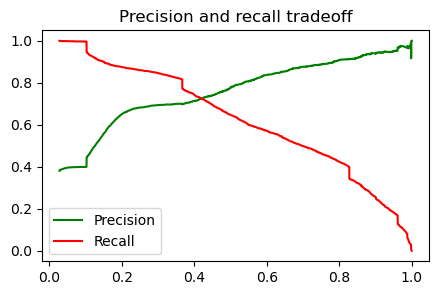

In [130]:
# Plotting precision-recall tradeoff

plt.figure(figsize = (5, 3))

plt.plot(thresholds, p[:-1], "g-", label = 'Precision')
plt.plot(thresholds, r[:-1], "r-", label = 'Recall')

plt.title('Precision and recall tradeoff')
plt.legend(loc = 'lower left')
plt.show()

### Test set - Predictions

In [131]:
# Listing out the columns present

X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Do Not Email_Yes',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Other Management Courses', 'Specialization_Others',
       'Specialization_Services Excellence',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'A free copy of Mastering The Intervie

In [132]:
# Inspecting the test variables before adding constant(intercept)


X_test = X_test[cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Do Not Email_Yes,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4269,0.964504,0,0,0,0,1,0
2376,-0.885371,1,0,0,0,1,0
7766,-0.777416,0,0,1,0,0,1
9199,-0.885371,0,0,0,0,0,0
4359,-0.885371,1,0,0,0,0,0


In [133]:
# Adding constant for intercept

X_test_rfe = sm.add_constant(X_test)

In [134]:
# Predicting the Dependent variable for test data-set

y_test_pred = res.predict(X_test_rfe)

In [135]:
# Overview of Predicted values

y_test_pred[:10]

4269    0.770201
2376    0.960258
7766    0.924876
9199    0.102903
4359    0.827110
9186    0.626375
1631    0.399730
8963    0.154456
8007    0.172485
5324    0.433380
dtype: float64

In [136]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.columns = ['Convert_Prob']

In [137]:
# Let's see the head

y_pred_1.head()

,Convert_Prob
4269,0.770201
2376,0.960258
7766,0.924876
9199,0.102903
4359,0.827110


In [138]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.columns = ['Convert']

In [139]:
# Putting Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

In [140]:
# Overview of Actual values along with the corresponding IDs

y_test_df.head()

,Convert,Prospect ID
4269,1,4269
2376,1,2376
7766,1,7766
9199,0,9199
4359,1,4359


In [141]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [142]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)

In [143]:
y_pred_final.head()

,Convert,Prospect ID,Convert_Prob
0,1,4269,0.770201
1,1,2376,0.960258
2,1,7766,0.924876
3,0,9199,0.102903
4,1,4359,0.827110


In [144]:
# Rearranging the columns

y_pred_final.reindex(['Prospect ID','Convert','Convert_Prob'], axis = 1).head()

,Prospect ID,Convert,Convert_Prob
0,4269,1,0.770201
1,2376,1,0.960258
2,7766,1,0.924876
3,9199,0,0.102903
4,4359,1,0.827110


In [145]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Convert,Prospect ID,Convert_Prob
0,1,4269,0.770201
1,1,2376,0.960258
2,1,7766,0.924876
3,0,9199,0.102903
4,1,4359,0.827110


In [146]:
# Creating cut-off Threshold 

y_pred_final['final_predicted'] = y_pred_final['Convert_Prob'].map(lambda x: 1 if x > 0.348 else 0)

In [147]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Convert,Prospect ID,Convert_Prob,final_predicted
0,1,4269,0.770201,1
1,1,2376,0.960258,1
2,1,7766,0.924876,1
3,0,9199,0.102903,0
4,1,4359,0.827110,1


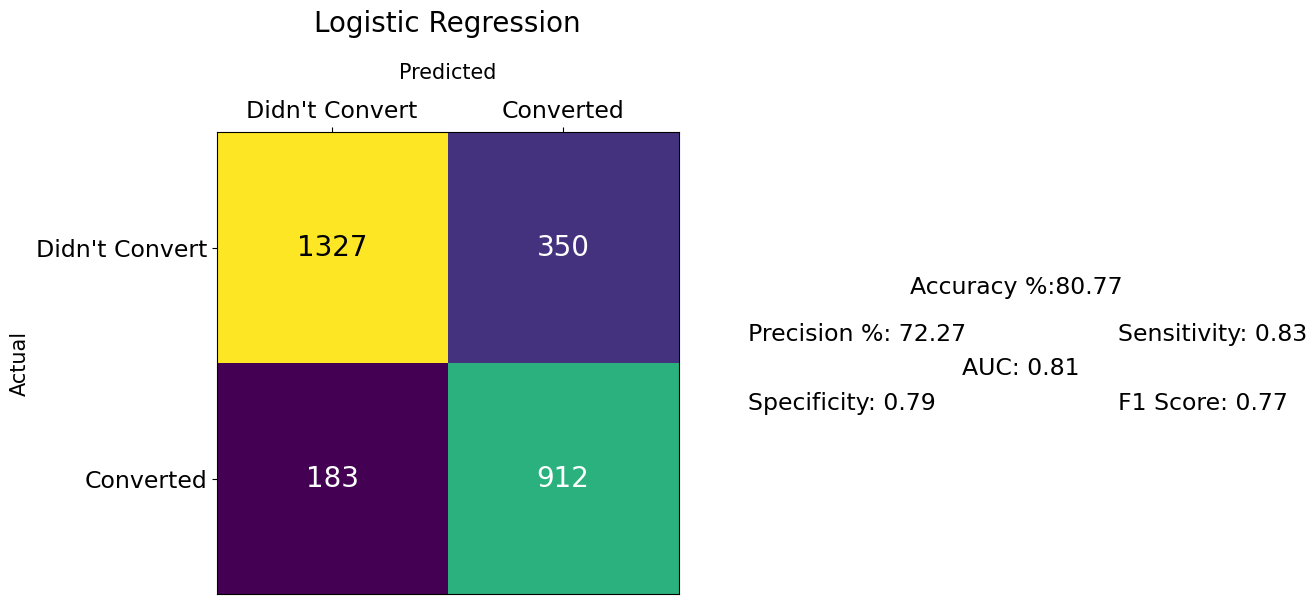

In [148]:
# Plotting confusion matrix for the test data-set

plot_ConfusionMatrix_metrics(confusion_matrix(y_pred_final['Convert'], y_pred_final['final_predicted']), 
                             y_pred_final['Convert'], y_pred_final['final_predicted'], 
                             class_names = ['Didn\'t Convert', 'Didn\'t Convert', 'Converted'], 
                             title = 'Logistic Regression')

> Model is giving the same values of almost all metrics except for Sensitivity. <br>

> Model is able to generalize well

## Lead Score

In [149]:
# Computing "Lead Score" and "Lead Score Code" - Train

y_train_pred_final['Lead Score'] = (y_train_pred_final['Convert_Prob'] * 100).astype('int')
y_train_pred_final['Lead Score Code'] = np.where(y_train_pred_final['final_predicted'] == 1, 'Hot', 'Cold')
y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score,Lead Score Code
1871,0,0.102903,1871,0,1,1,0,0,0,0,0,0,0,0,0,10,Cold
6795,0,0.210845,6795,0,1,1,1,0,0,0,0,0,0,0,0,21,Cold
3516,0,0.121176,3516,0,1,1,0,0,0,0,0,0,0,0,0,12,Cold
8105,0,0.830570,8105,1,1,1,1,1,1,1,1,1,1,0,1,83,Hot
3934,0,0.102903,3934,0,1,1,0,0,0,0,0,0,0,0,0,10,Cold


In [150]:
# Final Train data-set with neccessary columns and predicted values/codes

train_final = pd.concat([X_train_rfe, y_train_pred_final[['Lead Score', 'Lead Score Code']]], axis = 1)
train_final

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Do Not Email_Yes,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Lead Score,Lead Score Code
1871,1.0,-0.885371,0,0,0,0,0,0,10,Cold
6795,1.0,0.005716,0,0,0,0,0,0,21,Cold
3516,1.0,-0.691418,0,0,0,0,0,0,12,Cold
8105,1.0,1.365219,0,0,0,0,1,0,83,Hot
3934,1.0,-0.885371,0,0,0,0,0,0,10,Cold
...,...,...,...,...,...,...,...,...,...,...
350,1.0,-0.885371,1,0,0,0,0,0,82,Hot
79,1.0,0.404601,1,0,1,0,0,0,99,Hot
8039,1.0,-0.885371,0,0,0,0,0,0,10,Cold
6936,1.0,-0.449891,0,0,0,0,0,0,14,Cold


In [151]:
# Computing "Lead Score" and "Lead Score Code" - Test

y_pred_final['Lead Score'] = (y_pred_final['Convert_Prob'] * 100).astype('int')
y_pred_final['Lead Score Code'] = np.where(y_pred_final['final_predicted'] == 1, 'Hot', 'Cold')
y_pred_final.head()

,Convert,Prospect ID,Convert_Prob,final_predicted,Lead Score,Lead Score Code
0,1,4269,0.770201,1,77,Hot
1,1,2376,0.960258,1,96,Hot
2,1,7766,0.924876,1,92,Hot
3,0,9199,0.102903,0,10,Cold
4,1,4359,0.827110,1,82,Hot


In [152]:
# Final Test data-set with neccessary columns and predicted values/codes

test_final = pd.concat([X_test_rfe.reset_index(drop = True), y_pred_final[['Lead Score', 'Lead Score Code']]], axis = 1)
test_final

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Do Not Email_Yes,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Lead Score,Lead Score Code
0,1.0,0.964504,0,0,0,0,1,0,77,Hot
1,1.0,-0.885371,1,0,0,0,1,0,96,Hot
2,1.0,-0.777416,0,0,1,0,0,1,92,Hot
3,1.0,-0.885371,0,0,0,0,0,0,10,Cold
4,1.0,-0.885371,1,0,0,0,0,0,82,Hot
...,...,...,...,...,...,...,...,...,...,...
2767,1.0,-0.354744,0,0,0,0,0,0,15,Cold
2768,1.0,-0.885371,1,0,0,0,1,0,96,Hot
2769,1.0,-0.885371,0,0,0,0,0,0,10,Cold
2770,1.0,2.056864,0,1,0,0,0,0,32,Cold


| Measurement | Train Dataset | Test Dataset |
| --- | --- | --- |
| Accuracy | 79.79% | 80.77% |
| AUC | 0.8 | 0.81 |
| Specificity | 0.79 | 0. 78 |
| Sensitivity | 0.82 | 0.83 |
| Precision | 69.9% | 72.27 % |
| F1 Score | 0.76 | 0.77 |

### The model equation is given by:
$Lead Score $ =100*( (-1.3253) + (3.7307) * $Lead Origin\_Lead Add Form$ + (2.7500) * $What is your current occupation\_Working Professional$ + (1.6195) * $Last Notable Activity\_SMS Sent$ + (0.9489) * $Total Time Spent on Website$ - (1.3705) * $Do not Email\_Yes$ + (3.4897) * $Last Notable Activity\_Had a Phone Conversation$ + (1.8235) * $Last Notable Activity\_Unrechable$)


## Inferences:
1. The variable `Lead Origin_Lead Add Form `plays a prominent role in predicting the converted people. It confirms that there's a possibility of increased conversion as the forms originate as the source.<br><br>
2. `What is your current occupation_Working Professional` also affects  in the predicting the converted people positively. This was also observer in the EDA and these people can be targetted in a better way. <br><br>
4. `Last Notable Activity_SMS Sent`
5. `Total Time Spent on Website`
6. `Do not Email_Yes`
7. `Last Notable Activity\_Had a Phone Conversation`
8. `Last Notable Activity\_Unrechable`



## Summary

Initially we thoroughly inspected the data for missing values, found several columns with >30% and went forward with dropping then as they didn’t have any particular insight. During EDA, we found that several categorical columns had highly skewed values some with constant values only and dropped those too. While preforming Sanity checks we found that the entry ‘Select’ was present in many columns which is the default value in a drop-down, as the customer didn’t make any selection we went ahead and treated it as a missing value which wherever appropriate was handled by mode/median and where it’s dominance was >30%, the columns was dropped. Few columns also had the presence of outliers which was handled by capping at 99th percentile and categories with <5% counts was included into a category called ‘Others’. We then went ahead with performing EDA both uni-variant and bi-variant analysis where an interesting insight that working professional with referrals had the highest conversion rate but was approached less. Then prepared the data for model building by performing scaling the variables, test-train split, adding constant, creating dummies for categorical variables. <br><br>

First, built a model with all the variables which seemed to performed well but was suspected of high over-fitting (variance) the data. So went ahead with  Recursive Feature Elimination with variables. Then it was found that 1 variable `Last Notable Activity_Unreachable` was insignificant hence dropped it. After re-building the model we found that all the variables were significant and having Variance Inflation Factor (VIF) <2 which indicates that there was no multi-collinearity present in between the independent variables which were – ‘Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Do Not Email_Yes', ‘What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation', and 'Last Notable Activity_SMS Sent'. <br><br>

By performing a random thresholding (cut-off) we found that the model produced an accuracy score of 79.0 % and AUC of  0.77 which is better than a randomly guessed model. In order to find the optimum threshold we plotted a line plot between Accuracy, Sensitivity and Specificity Plot and found that the threshold value of 0.348 was where all the 3 met as is the optimum. Then plotted the confusion matrix to understand the sensitivity, specificity, precision and f1-score of the model which had a values of 0.82, 0.78, 69.94 and 0.76 respectively. Lastly, we went ahead with performing the evaluation by testing the model on the test data-set where the model’s sensitivity decreased by quite a margin but rest remained virtually same or increased by 1% or so. The AUC on the train set was 0.8 while on test set it 0.81, suggesting that the model is also able to generalize well. Finally, we calculated the Lead Score by multiplying the prediction by 100 and retaining the integer part only and label them as hot leads/cold leads based on a optimum cut-off point. We then went forward with presenting our insights and findings as well as showcasing the model with the help of a PPT which can aid in improvising the conversion rate.

 We found that 𝐿𝑒𝑎𝑑𝑂𝑟𝑖𝑔𝑖𝑛_𝐿𝑒𝑎𝑑𝐴𝑑𝑑𝐹𝑜𝑟𝑚, 𝑊ℎ𝑎𝑡𝑖𝑠𝑦𝑜𝑢𝑟𝑐𝑢𝑟𝑟𝑒𝑛𝑡𝑜𝑐𝑐𝑢𝑝𝑎𝑡𝑖𝑜𝑛_𝑊𝑜𝑟𝑘𝑖𝑛𝑔𝑃𝑟𝑜𝑓𝑒𝑠𝑠𝑖𝑜𝑛𝑎𝑙, 𝐿𝑎𝑠𝑡𝑁𝑜𝑡𝑎𝑏𝑙𝑒𝐴𝑐𝑡𝑖𝑣𝑖𝑡𝑦_𝑆𝑀𝑆𝑆𝑒𝑛𝑡, 𝑇𝑜𝑡𝑎𝑙𝑇𝑖𝑚𝑒𝑆𝑝𝑒𝑛𝑡𝑜𝑛𝑊𝑒𝑏𝑠𝑖𝑡𝑒, 𝐷𝑜𝑛𝑜𝑡𝐸𝑚𝑎𝑖𝑙_𝑌𝑒𝑠, 𝐿𝑎𝑠𝑡𝑁𝑜𝑡𝑎𝑏𝑙𝑒𝐴𝑐𝑡𝑖𝑣𝑖𝑡𝑦_𝐻𝑎𝑑𝑎𝑃ℎ𝑜𝑛𝑒𝐶𝑜𝑛𝑣𝑒𝑟𝑠𝑎𝑡𝑖𝑜𝑛 and 𝐿𝑎𝑠𝑡𝑁𝑜𝑡𝑎𝑏𝑙𝑒𝐴𝑐𝑡𝑖𝑣𝑖𝑡𝑦_𝑈𝑛𝑟𝑒𝑐ℎ𝑎𝑏𝑙𝑒  are the predictors that explain the data well.